In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from matplotlib import pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

DATATFRAME HAS 7725 ROWS AND 25 COLUMNS

In [4]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


mean minimum temperature is 22.9 and maximum temperature is 30.2

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we see many columns has null values

Handling null values

Text(0.5, 1.0, 'Maximum Temperature Prediction')

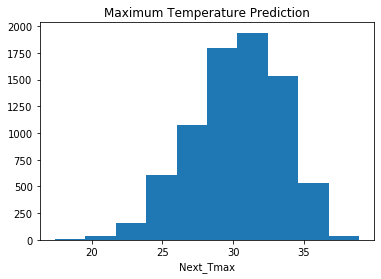

In [8]:
plt.hist(df['Next_Tmax'])
plt.xlabel('Next_Tmax')
plt.title('Maximum Temperature Prediction')

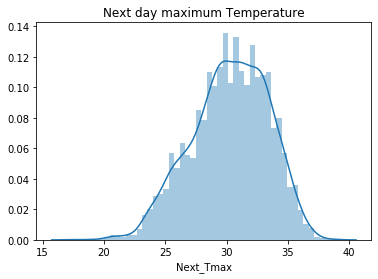

In [9]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clears that next day maximum temparature distribution is lies between 22 to 37.

Text(0.5, 1.0, 'Minimum Temperature Prediction')

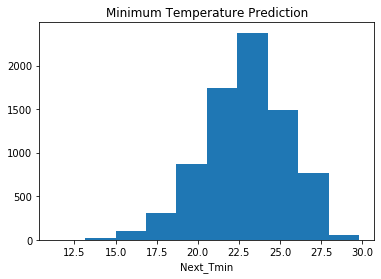

In [10]:
plt.hist(df['Next_Tmin'])
plt.xlabel('Next_Tmin')
plt.title('Minimum Temperature Prediction')

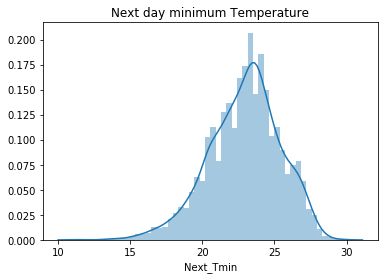

In [11]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distplot clears that next day minimum temparature distribution is lies between 15 to 28.

In [12]:
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [13]:
df.isnull().sum() 

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [15]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [16]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Converting all Object attributes into Numerical attributes by using LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

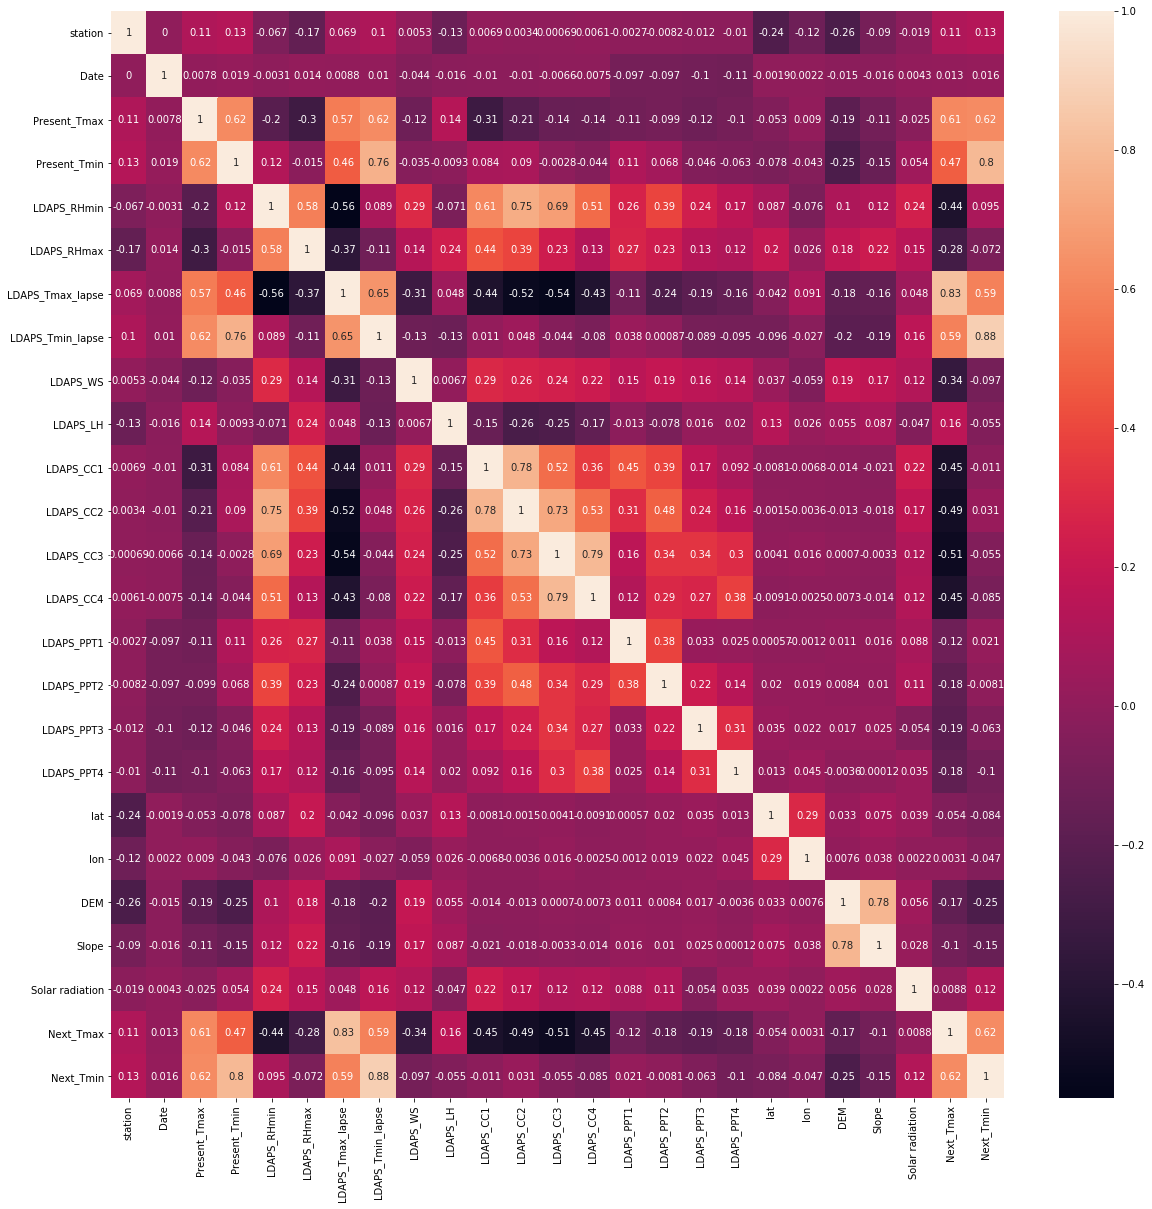

In [18]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

The features LDAPS_Tmin_lapse,present_min,LDAPS_Tmax_lapse,present_max are positively correlated with next min and next max

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 4.73283412e-02, 3.61325771e-01, ...,
        1.51793488e+00, 3.76282142e-01, 6.97599301e-01],
       [1.52562236e+00, 4.73283412e-02, 7.21084007e-01, ...,
        1.22994952e+00, 7.20972505e-02, 1.74063574e-01],
       [1.38692941e+00, 4.73283412e-02, 6.19608090e-01, ...,
        1.21653443e+00, 2.64259847e-01, 3.89744132e-01],
       ...,
       [1.66431530e+00, 8.13430765e-02, 2.22171758e+00, ...,
        2.07432510e+00, 7.92634435e-01, 2.22793450e+00],
       [0.00000000e+00, 6.21890289e+01, 3.30412736e+00, ...,
        2.35821196e+00, 4.12345278e+00, 4.68452522e+00],
       [0.00000000e+00, 6.21890289e+01, 2.64912642e+00, ...,
        1.51793488e+00, 2.76237361e+00, 2.76579089e+00]])

In [20]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [21]:
df.shape

(7752, 25)

In [22]:
df_new.shape

(6894, 25)

In [23]:
df.skew()

station              0.000000
Date               -62.064166
Present_Tmax        -0.264137
Present_Tmin        -0.367538
LDAPS_RHmin          0.300220
LDAPS_RHmax         -0.855015
LDAPS_Tmax_lapse    -0.227880
LDAPS_Tmin_lapse    -0.581763
LDAPS_WS             1.579236
LDAPS_LH             0.673757
LDAPS_CC1            0.459458
LDAPS_CC2            0.472350
LDAPS_CC3            0.640735
LDAPS_CC4            0.666482
LDAPS_PPT1           5.393821
LDAPS_PPT2           5.775355
LDAPS_PPT3           6.457129
LDAPS_PPT4           6.825464
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -0.340200
Next_Tmin           -0.404447
dtype: float64

In [24]:
x= df.drop('Next_Tmax',axis=1)
y= df['Next_Tmax']

To handle Skewness using Power transform function.

In [25]:
from sklearn.preprocessing import power_transform
df_max=power_transform(x)

df_max=pd.DataFrame(df_max,columns=x.columns)

In [26]:
df_max.skew()

station             -0.204565
Date               -17.124736
Present_Tmax        -0.035006
Present_Tmin        -0.012048
LDAPS_RHmin         -0.017469
LDAPS_RHmax         -0.115143
LDAPS_Tmax_lapse    -0.009351
LDAPS_Tmin_lapse    -0.017827
LDAPS_WS             0.002408
LDAPS_LH             0.057403
LDAPS_CC1            0.046757
LDAPS_CC2            0.045326
LDAPS_CC3            0.087933
LDAPS_CC4            0.126895
LDAPS_PPT1           1.404189
LDAPS_PPT2           1.577808
LDAPS_PPT3           1.747820
LDAPS_PPT4           1.963848
lat                  0.000000
lon                 -0.198429
DEM                  0.039456
Slope                0.233968
Solar radiation     -0.176636
Next_Tmin           -0.013745
dtype: float64

In [27]:
x=df_max
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.860356,-1.0743,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,...,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,-0.745293
1,-1.648385,-1.0743,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,...,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,-0.240855
2,-1.454848,-1.0743,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,...,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,0.342379
3,-1.273958,-1.0743,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,...,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,0.516713
4,-1.102545,-1.0743,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,...,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,-0.240855


In [28]:
col_r=['Date','station','Next_Tmin']
p= df.drop('Next_Tmin',axis=1)
q= df['Next_Tmin']

In [29]:
from sklearn.preprocessing import power_transform
df_min=power_transform(p)

df_min=pd.DataFrame(df_min,columns=p.columns)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [33]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.8058849913666711
Mean squared error 1.1537066614972507
Root Mean squared error 1.0741073789418125
R2 Score 0.8827218005903944
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.7530453344852853
Mean squared error 1.0491619094611224
Root Mean squared error 1.0242860486510212
R2 Score 0.8933491296036542
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.9618806296151572
Mean squared error 1.7494402754424996
Root Mean squared error 1.3226640826160283
R2 Score 0.8221634559929861
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.1092931053497042
Mean squared error 2.0657865920222442
Root Mean squared error 1.4372844506298132
R2 Score 0.7900057787978269
-------------------

cross validation

In [34]:
scorel=[]

In [36]:
from sklearn.utils import shuffle
scorel=[]
x= df.drop('Next_Tmax',axis=1)
y= df['Next_Tmax']
x, y = shuffle(x, y, random_state = 7)

In [37]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.7711333 , 0.80952352, 0.78285275, 0.74753515, 0.80306827])

In [38]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-0.0024755 , -0.00804842, -0.00729559, -0.00185264, -0.01237202])

In [39]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.80149181, 0.83713824, 0.80220286, 0.77427179, 0.79123622])

In [40]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.78781399, 0.81291624, 0.78847351, 0.78761998, 0.77548773])

In [41]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.72069076, 0.74844583, 0.72721528, 0.71554619, 0.70421273])

In [42]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.91340336, 0.93283832, 0.91256918, 0.90811378, 0.90412442])

In [43]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.86106688, 0.88551129, 0.86120317, 0.86169349, 0.85676516])

Difference of predicted model and crossvalidation score

In [44]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [-0.1115885  -0.07319828 -0.09986906 -0.13518666 -0.07965353]
SVR() difference is [-0.89582463 -0.90139755 -0.90064472 -0.89520177 -0.90572115]
DecisionTreeRegressor() difference is [-0.02067165  0.01497479 -0.01996059 -0.04789167 -0.03092724]
LinearRegression() difference is [-0.00219179  0.02291046 -0.00153227 -0.0023858  -0.01451805]
Lasso() difference is [0.13776    0.16551507 0.14428452 0.13261542 0.12128197]
RandomForestRegressor() difference is [-0.00109198  0.01834298 -0.00192617 -0.00638156 -0.01037092]
GradientBoostingRegressor() difference is [-0.00596399  0.01848041 -0.0058277  -0.00533739 -0.01026571]


DecisionTreeRegressor has least difference

HyperTuning

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=DecisionTreeRegressor(max_leaf_nodes=100,criterion='mse',max_depth=8,min_samples_split=10,min_samples_leaf=20)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)

Accuracy 80.0
Mean absolute error 1.0542108455520198
Mean squared error 1.947246050280044
Root Mean squared error 1.3954375837994488
r2 score 80.0


Modelling and predicting minimum temperature

In [48]:
col_r=['Date','station','Next_Tmin']
p= df.drop('Next_Tmin',axis=1)
q= df['Next_Tmin']

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=p
y=q

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [51]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.852256047505018
Mean squared error 1.3790197749842568
Root Mean squared error 1.1743167268604568
R2 Score 0.7840140923650469
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.978692697867222
Mean squared error 6.420328848281422
Root Mean squared error 2.5338367840651106
R2 Score -0.0055697378427852495
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.838681341656063
Mean squared error 1.3228390970029331
Root Mean squared error 1.1501474240300384
R2 Score 0.7928132662024792
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.7519328673926879
Mean squared error 0.9146992886699481
Root Mean squared error 0.956399126238595
R2 Score 0.8567372566657501
--------------------

cross validation

In [52]:
scorel=[]

In [53]:
from sklearn.utils import shuffle
scorel=[]
x=p
y=q
x, y = shuffle(x, y, random_state = 7)

In [54]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.78966379, 0.80801252, 0.77744901, 0.78259519, 0.80857742])

In [55]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-0.00413264, -0.01380231, -0.00412615, -0.00269936, -0.00934257])

In [56]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.82761259, 0.82646845, 0.80132487, 0.78717935, 0.79119219])

In [57]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.85533417, 0.84933   , 0.84369397, 0.84126882, 0.84419042])

In [58]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.80724591, 0.80359496, 0.80110903, 0.78718397, 0.79930619])

In [59]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.91624608, 0.91822517, 0.90693672, 0.90674959, 0.91311988])

In [60]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.90272638, 0.89894651, 0.89487763, 0.88756879, 0.89639196])

Difference of predicted model and crossvalidation score

In [61]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [ 0.0056497   0.02399842 -0.00656508 -0.0014189   0.02456333]
SVR() difference is [ 0.00143709 -0.00823258  0.00144359  0.00287038 -0.00377284]
DecisionTreeRegressor() difference is [ 0.03479932  0.03365518  0.0085116  -0.00563392 -0.00162108]
LinearRegression() difference is [-0.00140309 -0.00740725 -0.01304328 -0.01546843 -0.01254684]
Lasso() difference is [-0.00160868 -0.00525963 -0.00774556 -0.02167062 -0.0095484 ]
RandomForestRegressor() difference is [-0.00021581  0.00176329 -0.00952516 -0.00971229 -0.00334201]
GradientBoostingRegressor() difference is [-0.00031726 -0.00409712 -0.00816601 -0.01547485 -0.00665167]


Hyper Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = { "normalize":[True, False], "copy_X":[True, False],
              "fit_intercept": [True, False]
              }
grid = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = "r2")

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model1=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
model1.fit(xtrain,ytrain)
p=model1.predict(xtest)
acc=model1.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)

Accuracy 85.0
Mean absolute error 0.7630533051373398
Mean squared error 0.9508938680808134
Root Mean squared error 0.9751378713191348
r2 score 85.0


Saving the file

In [65]:
from joblib import dump
dump(model, 'model_maxtemp.joblib')

['model_maxtemp.joblib']

In [66]:
from joblib import dump
dump(model1, 'model_mintemp.joblib')

['model_mintemp.joblib']

In [67]:
from joblib import load
loaded = load('model_maxtemp.joblib')

In [68]:
from joblib import load
loaded = load('model_mintemp.joblib')